<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             48842 non-null  int64
 1   Workclass       48842 non-null  int32
 2   fnlwgt          48842 non-null  int64
 3   Education       48842 non-null  int32
 4   Education_num   48842 non-null  int64
 5   Marital_Status  48842 non-null  int32
 6   Occupation      48842 non-null  int32
 7   Relationship    48842 non-null  int32
 8   Race            48842 non-null  int32
 9   Capital_gain    48842 non-null  int64
 10  Capital_loss    48842 non-null  int64
 11  Hours_per_week  48842 non-null  int64
 12  Native_country  48842 non-null  int32
 13  Income          48842 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.7 MB


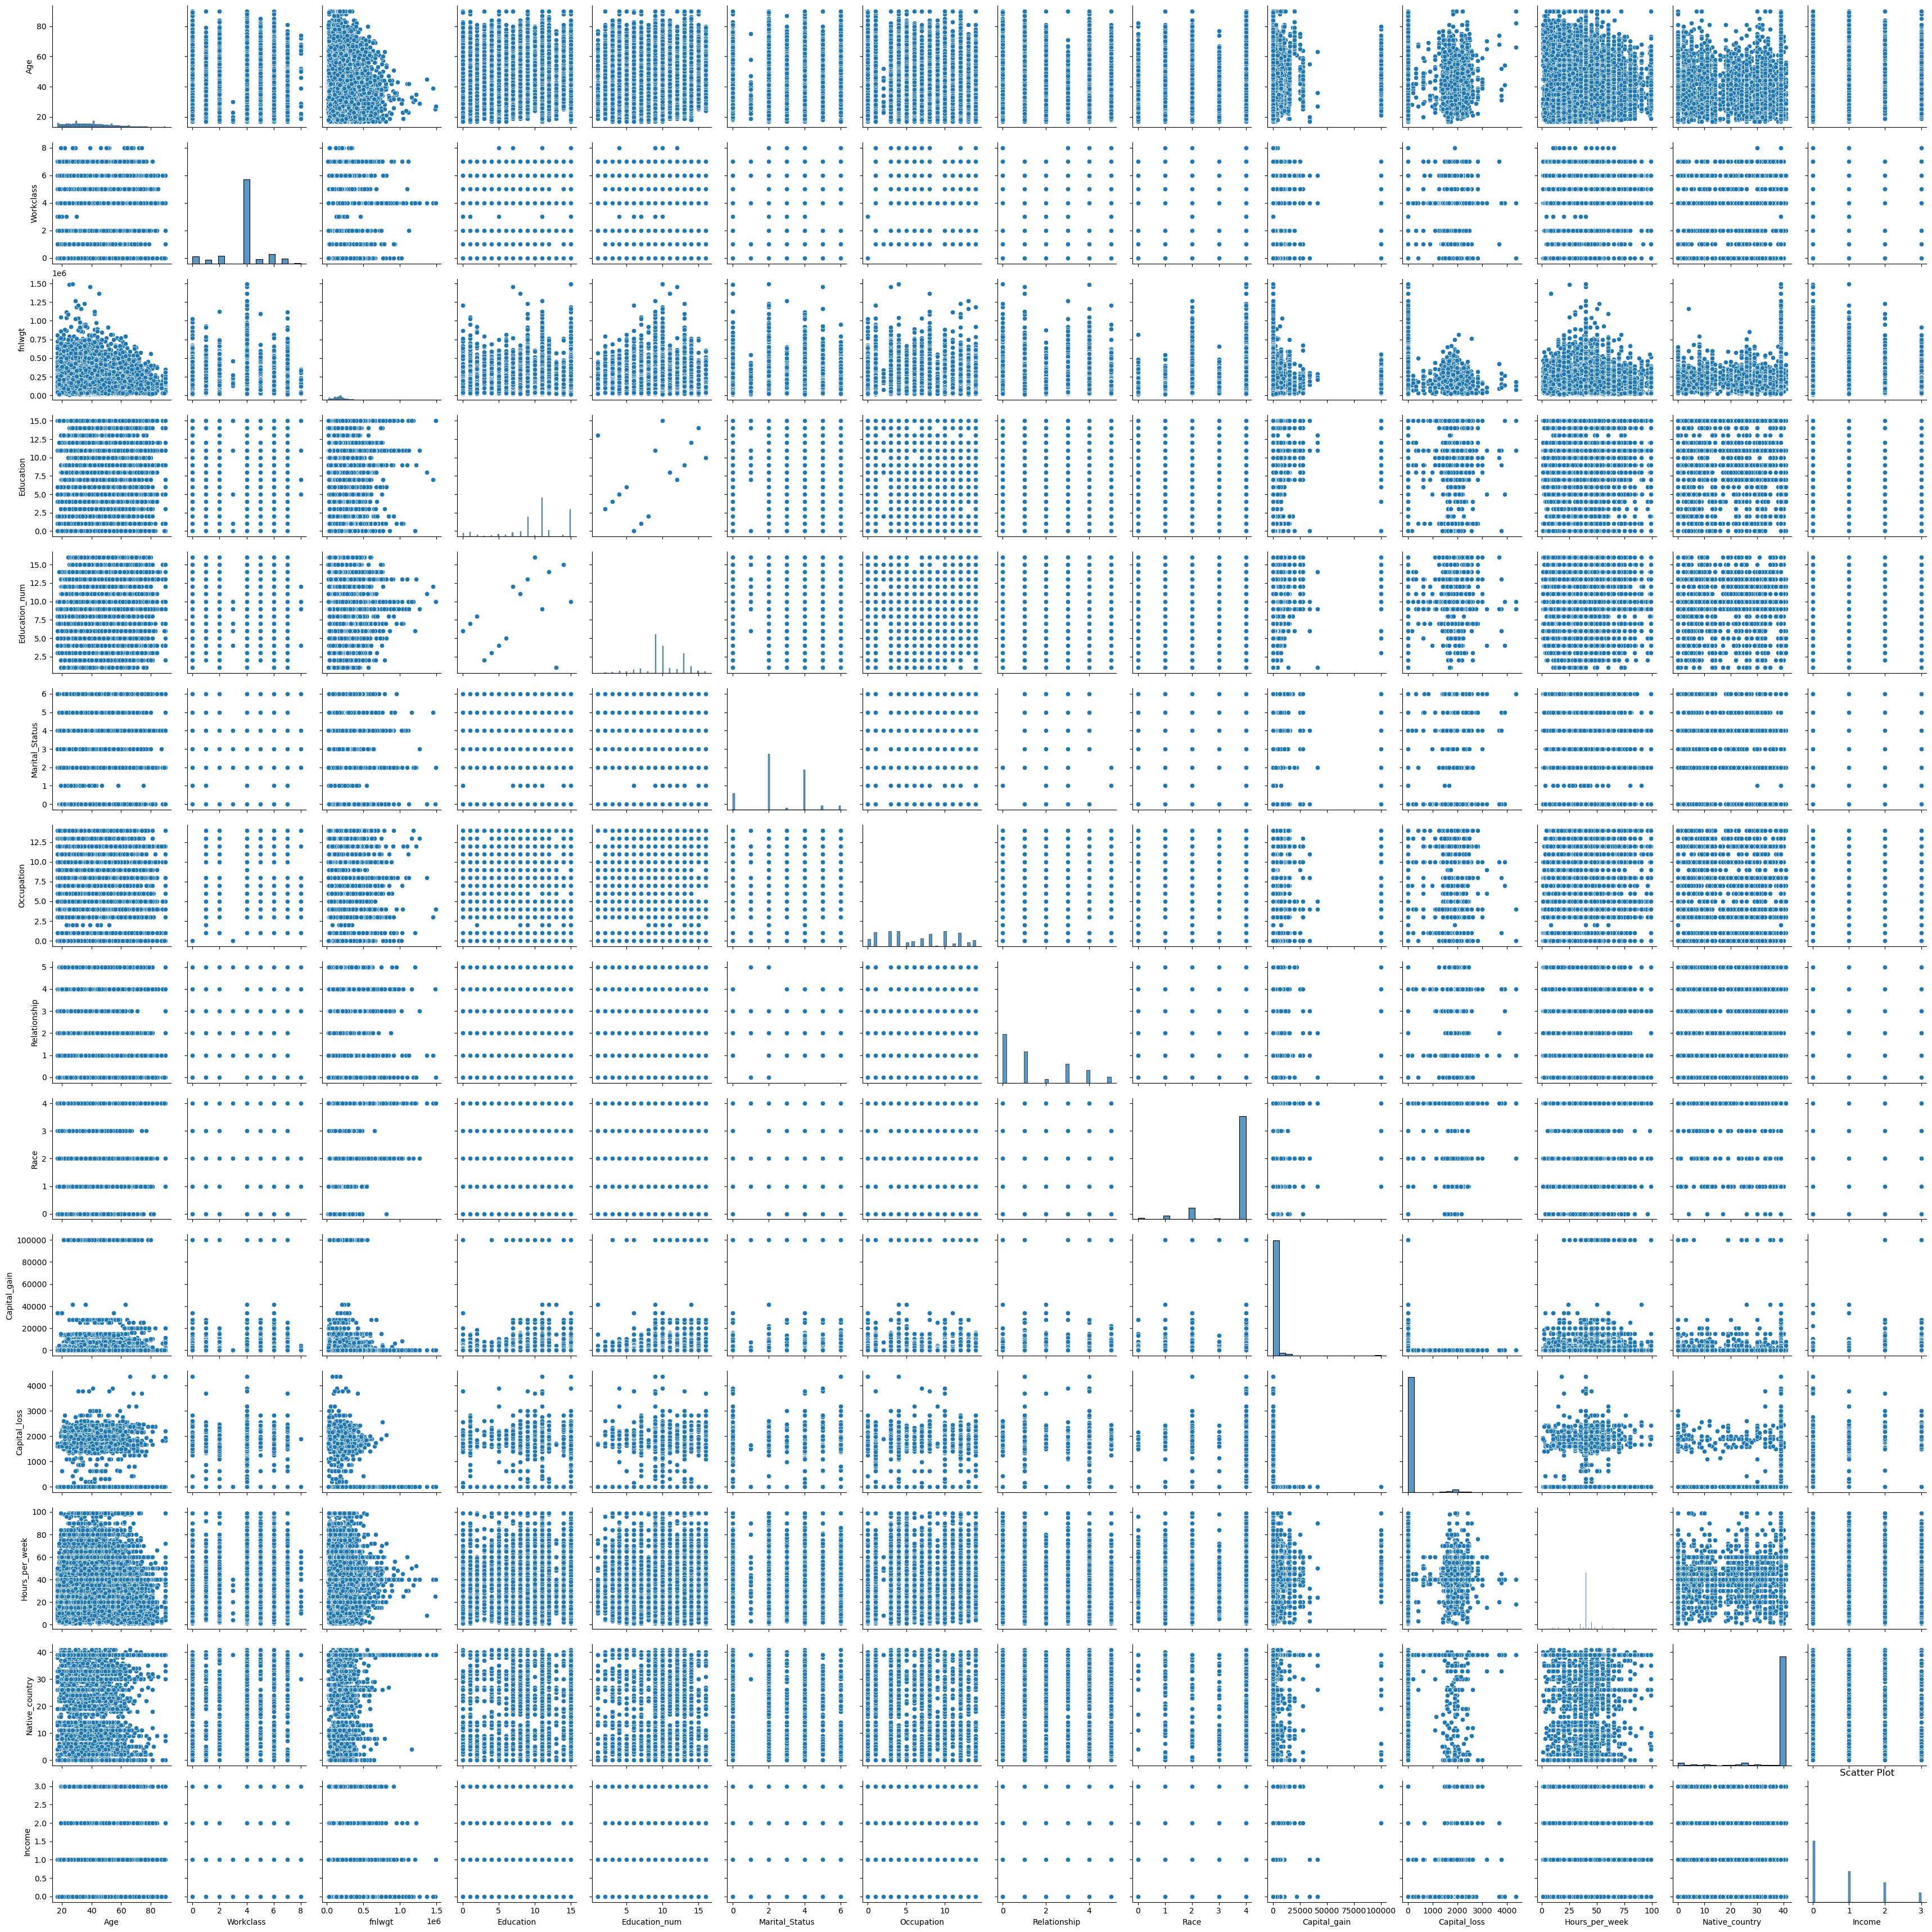

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      8945
           1       0.00      0.00      0.00         0
         114       0.00      0.00      0.00         3
         401       0.00      0.00      0.00         1
         594       0.00      0.00      0.00        11
         914       0.00      0.00      0.00         2
         991       0.00      0.00      0.00         2
        1055       0.00      0.00      0.00        11
        1086       0.00      0.00      0.00         3
        1151       0.00      0.00      0.00         1
        1173       0.00      0.00      0.00         1
        1409       0.00      0.00      0.00         1
        1471       0.00      0.00      0.00         1
        1506       0.00      0.00      0.00         4
        1797       0.00      0.00      0.00         1
        1848       0.00      0.00      0.00         2
        2050       0.00      0.00      0.00         1
    

C:\Users\sebha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebha\anaconda3\lib\site-packages\sklearn\metrics\_cla

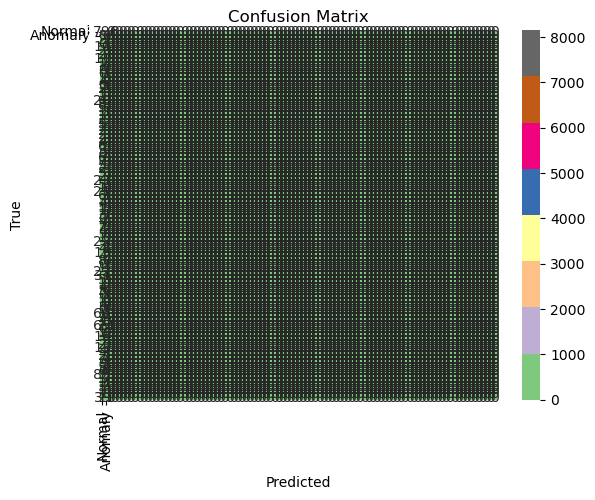

Precision: 0.83
Recall: 0.83
F1 Score: 0.83


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

def anomaly_detection_isolation_forest():
    
    #load dataset
      # Load dataset
    data = pd.read_csv('adultdata.csv')
    
    #convert all the values in the columns into numeric
    label_encoder = LabelEncoder()
    for column in data.select_dtypes(include=['object']).columns:
        data[column] = label_encoder.fit_transform(data[column])
    
    data = data.drop('Sex', axis=1)
    
    X = data.drop('Capital_gain', axis=1)  # Assuming 'target' is the column name of the continuous target variable
    y_cont = data['Capital_gain']
    
    y = np.where(y_cont > 80000, 1, 0)  # Define `threshold` based on your domain knowledge
    
    # Select top k features; k might be adjusted based on the dataset
    selector = SelectKBest(f_classif, k=5)
    X_selected = selector.fit_transform(X, y)
    
    data.info()


    data.dropna(axis=0, inplace=True)
    
    
    sns.pairplot(data, kind='scatter')
    plt.title('Scatter Plot')
    plt.show()
    
    
    
    
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_cont, test_size=0.2, random_state=5)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Isolation Forest
    clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=5)
    clf.fit(X_train_scaled)
    
    # Predictions
    y_pred = clf.predict(X_test_scaled)
    y_pred = np.where(y_pred == 1, 0, 1)  # Convert predictions: -1 for anomalies, 1 for normal to match our labels
    
    # Evaluation
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Accent', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
     # Evaluate the SVM model
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
     # Print the evaluation metrics
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))

# Example usage:
anomaly_detection_isolation_forest()
